In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

In [2]:
font = {'size': 10}

plt.rc('font', **font)

colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf']

In [3]:
def fk(k, x, n=1):
    
    result = k * x * (1 - x)
    
    for _ in range(n-1):
        result = k * result * (1 - result)
    
    return result

def g(x, n=1):
    
    result = 1 - np.abs(1 - 2 * x)
    
    for _ in range(n-1):
        result = 1 - np.abs(1 - 2 * result)
    
    return result

x = np.linspace(0, 1, 300)

# Figure 1

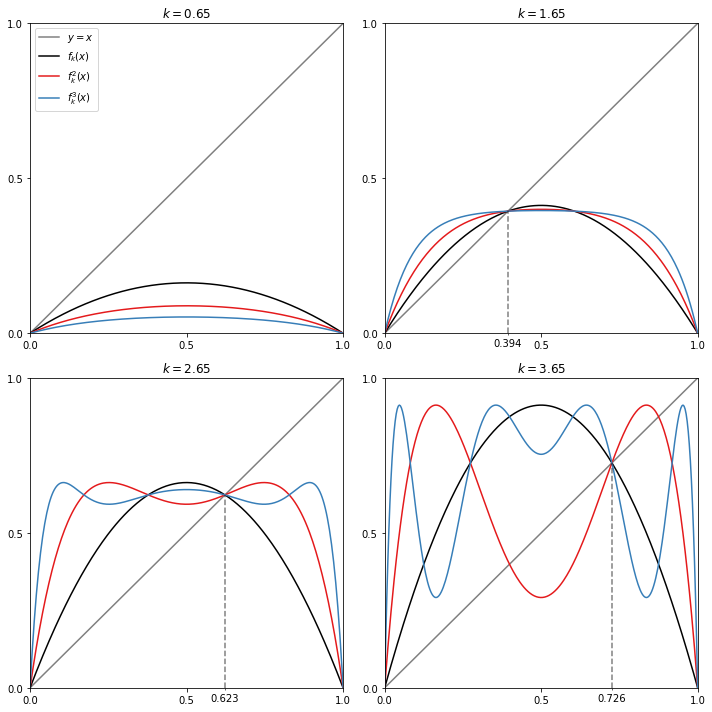

In [4]:
k_vals = [.65, 1.65, 2.65, 3.65]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), facecolor='w')

for i, k in enumerate(k_vals):
    
    col, row = i % 2, i // 2 
    
    fix = 1 - (1 / k)
    
    ax[row, col].plot([0, 1], [0, 1], color='k', alpha=.5, label=r'$y=x$')
    ax[row, col].plot(x, fk(k, x), label=r'$f_k(x)$', color='k')
    ax[row, col].plot(x, fk(k, x, 2), label=r'$f^2_k(x)$', color=colors[0])
    ax[row, col].plot(x, fk(k, x, 3), label=r'$f^3_k(x)$', color=colors[1])
    ax[row, col].axvline(fix, ymax=fix, color='k', ls='--', alpha=.5) # Fixed point

    ax[row, col].set_xlim([0, 1])
    ax[row, col].set_ylim([0, 1])    
    ax[row, col].set_xticks([0, 0.5, 1])
    ax[row, col].set_yticks([0, 0.5, 1])
    ax[row, col].set_title(f'$k = {k}$')

    # Add minor tick for fixed point
    if i > 0:
        ax[row, col].set_xticks([fix], minor=True)
        ax[row, col].set_xticklabels([fix], minor=True)
        ax[row, col].xaxis.set_minor_formatter(FormatStrFormatter('%.3f'))
        
    if (row, col) == (0, 0):
        ax[row, col].legend()
        
plt.tight_layout()
fig.savefig('plots/figure_1.svg')

# Figure 2

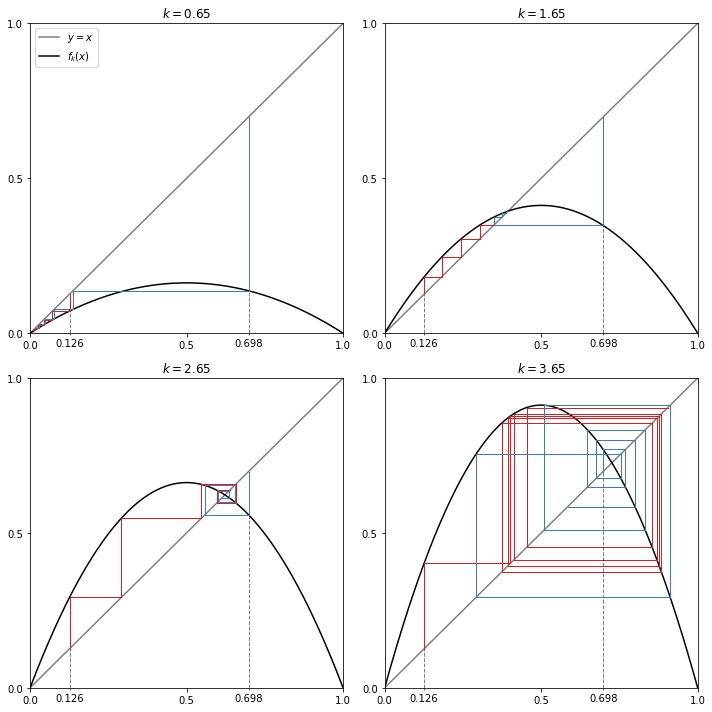

In [5]:
n_points = [10, 10, 10, 20]
pts_x0 = [.126, .698]
pts_col = [colors[0], colors[1]]

### Plotting ###################################################################
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), facecolor='w')

for i, k in enumerate(k_vals):
    
    col, row = i % 2, i // 2 
    
    ax[row, col].plot([0, 1], [0, 1], color='k', alpha=.5, label=r'$y=x$')
    ax[row, col].plot(x, fk(k, x), label=r'$f_k(x)$', color='k')
    
    for x0, c in zip(pts_x0, pts_col):

        vec_x = [x0]
        for j in range(10):
            vec_x.append(fk(k, vec_x[j]))
        V = np.vstack((np.repeat(np.array(vec_x), 2)[:-1],
                       np.repeat(np.array(vec_x), 2)[1:]))

        # Draw starting line
        ax[row, col].axvline(x0, ymax=x0, color='k', lw=1, ls='--', alpha=.5)
        
        # Draw points
        for p in range(n_points[i]):
            ax[row, col].plot(
                [V[0, p], V[0, p+1]], 
                [V[1, p], V[1, p+1]], 
                color=c,
                linewidth=1
            )
            
    # Set labels
    ax[row, col].set_xticks(pts_x0, minor=True)
    ax[row, col].set_xticklabels(pts_x0, minor=True)
    ax[row, col].xaxis.set_minor_formatter(FormatStrFormatter('%.3f'))

    ax[row, col].set_xlim([0, 1])
    ax[row, col].set_ylim([0, 1])    
    ax[row, col].set_xticks([0, 0.5, 1])
    ax[row, col].set_yticks([0, 0.5, 1])
    ax[row, col].set_title(f'$k = {k}$')
    
    if (row, col) == (0, 0):
        ax[row, col].legend()
        
plt.tight_layout()
fig.savefig('plots/figure_2.svg')

# Figure 3a & 3b

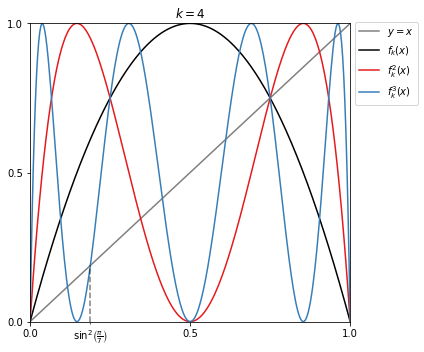

In [6]:
k = 4

fig, ax = plt.subplots(figsize=(6, 5), facecolor='w')

ax.plot([0, 1], [0, 1], color='k', alpha=.5, label=r'$y=x$')
ax.plot(x, fk(k, x), label=r'$f_k(x)$', color='k')
ax.plot(x, fk(k, x, 2), label=r'$f^2_k(x)$', color=colors[0])
ax.plot(x, fk(k, x, 3), label=r'$f^3_k(x)$', color=colors[1])

# Add special point
x_special = np.sin(np.pi / 7) ** 2 
ax.axvline(x_special, ymax=x_special, color='k', alpha=.5, ls='--')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])    
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_title(f'$k = {k}$')

# Set labels
ax.set_xticks([x_special], minor=True)
ax.set_xticklabels([r'$\sin^{2}\left(\frac{\pi}{7}\right)$'], minor=True)

ax.legend(bbox_to_anchor=(1.0, 1.02))

plt.tight_layout()
fig.savefig('plots/figure_3a.svg')

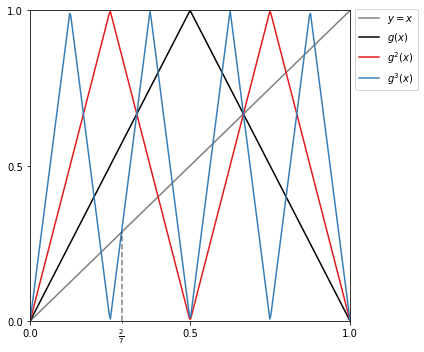

In [7]:
fig, ax = plt.subplots(figsize=(6, 5), facecolor='w')

ax.plot([0, 1], [0, 1], color='k', alpha=.5, label=r'$y=x$')
ax.plot(x, g(x), label=r'$g(x)$', color='k')
ax.plot(x, g(x, 2), label=r'$g^2(x)$', color=colors[0])
ax.plot(x, g(x, 3), label=r'$g^3(x)$', color=colors[1])

# Add special point
x_special = 2 / 7 
ax.axvline(x_special, ymax=x_special, color='k', alpha=.5, ls='--')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])    
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

# Set labels
ax.set_xticks([x_special], minor=True)
ax.set_xticklabels([r'$\frac{2}{7}$'], minor=True)

ax.legend(bbox_to_anchor=(1.0, 1.02))

plt.tight_layout()
fig.savefig('plots/figure_3b.svg')

# Figure 4

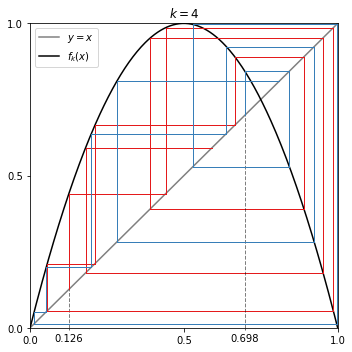

In [8]:
n_points = 20
pts_x0 = [.126, .698]
pts_col = [colors[0], colors[1]]

# 'Figure 2' style plot
fig, ax = plt.subplots(figsize=(5, 5), facecolor='w')

ax.plot([0, 1], [0, 1], color='k', alpha=.5, label=r'$y=x$')
ax.plot(x, fk(k, x), label=r'$f_k(x)$', color='k')

for x0, c in zip(pts_x0, pts_col):

    vec_x = [x0]
    for j in range(10):
        vec_x.append(fk(k, vec_x[j]))
    V = np.vstack((np.repeat(np.array(vec_x), 2)[:-1],
                   np.repeat(np.array(vec_x), 2)[1:]))

    # Draw starting line
    ax.axvline(x0, ymax=x0, color='k', lw=1, ls='--', alpha=.5)

    # Draw points
    for p in range(n_points):
        ax.plot(
            [V[0, p], V[0, p+1]], 
            [V[1, p], V[1, p+1]], 
            color=c,
            linewidth=1
        )

# Set labels
ax.set_xticks(pts_x0, minor=True)
ax.set_xticklabels(pts_x0, minor=True)
ax.xaxis.set_minor_formatter(FormatStrFormatter('%.3f'))

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])    
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])
ax.set_title(f'$k = {k}$')
ax.legend()

plt.tight_layout()
fig.savefig('plots/figure_4.svg')

# Figure 5

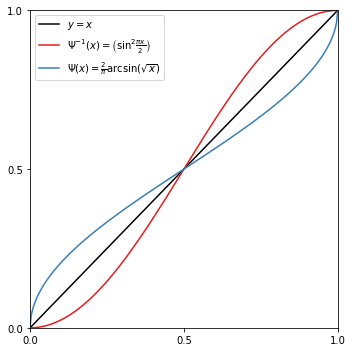

In [9]:
fig, ax = plt.subplots(figsize=(5, 5), facecolor='w')

ax.plot([0, 1], [0, 1], color='k', label=r'$y=x$')
ax.plot(
    x, 
    np.sin(np.pi * x / 2) ** 2, 
    label=r'$\Psi^{-1}(x)=\left(\sin^{2}\frac{\pi x}{2}\right)$', 
    color=colors[0]
)
ax.plot(
    x, 
    2 / np.pi * np.arcsin(np.sqrt(x)), 
    label=r'$\Psi(x)=\frac{2}{\pi}\arcsin\left(\sqrt{x}\right)$', 
    color=colors[1]
)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])    
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

ax.legend()

plt.tight_layout()
fig.savefig('plots/figure_5.svg')

# Figure 6

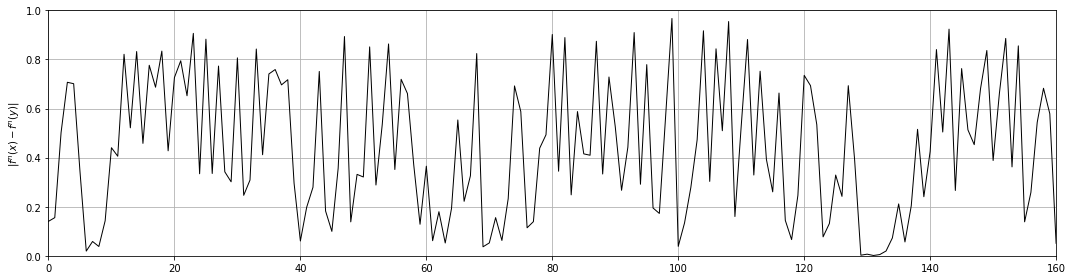

In [10]:
x0 = 0.708585640758287 
y0 = 0.5681526913978696

k = 4
n_iter = 160

vec_x, vec_y = np.zeros(n_iter+1), np.zeros(n_iter+1)
vec_x[0], vec_y[0] = x0, y0

for i in range(1, n_iter+1):
    vec_x[i] = fk(k, vec_x[i-1])
    vec_y[i] = fk(k, vec_y[i-1])

diff = np.abs(vec_x - vec_y)

fig, ax = plt.subplots(figsize=(15, 4), facecolor='w')
ax.plot(diff, 'k', lw=1)
ax.set_xlim([0, n_iter])
ax.set_ylim([0, 1])
ax.set_ylabel(r'$|f^n(x)-f^n(y)|$')

ax.grid()
plt.tight_layout()
fig.savefig('plots/figure_6.svg')

# Figure 7

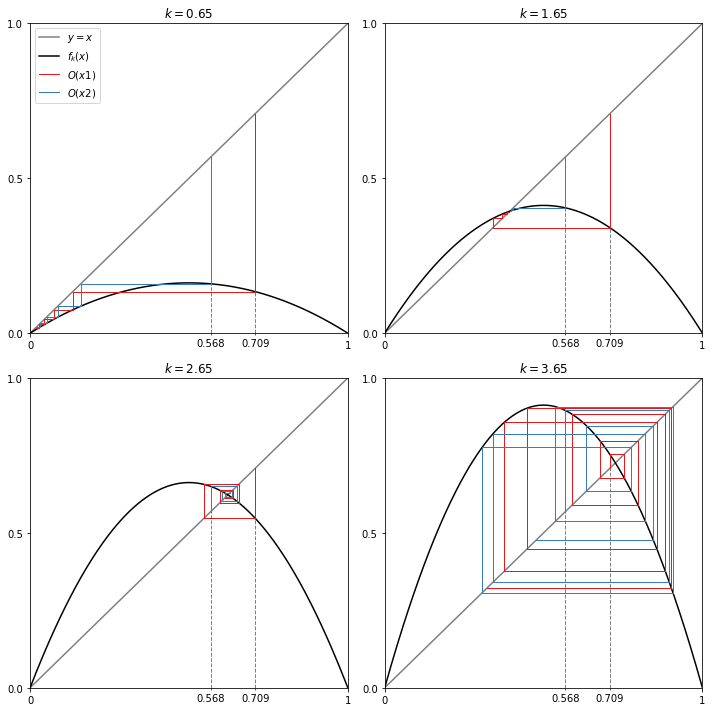

In [11]:
n_points = [10, 10, 10, 20]
pts_x0 = [x0, y0]
pts_col = [colors[0], colors[1]]

### Plotting ###################################################################
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), facecolor='w')

for i, k in enumerate(k_vals):
    
    col, row = i % 2, i // 2 
    
    ax[row, col].plot([0, 1], [0, 1], color='k', alpha=.5, label=r'$y=x$')
    ax[row, col].plot(x, fk(k, x), label=r'$f_k(x)$', color='k')
    
    ix = 0
    for x0_, c in zip(pts_x0, pts_col):
        ix += 1
        
        vec_x = [x0_]
        for j in range(10):
            vec_x.append(fk(k, vec_x[j]))
        V = np.vstack((np.repeat(np.array(vec_x), 2)[:-1],
                       np.repeat(np.array(vec_x), 2)[1:]))

        # Draw starting line
        ax[row, col].axvline(x0_, ymax=x0_, color='k', lw=1, ls='--', alpha=.5)
        
        # Draw points
        for p in range(n_points[i]):
            if p == 0:
                ax[row, col].plot(
                    [V[0, p], V[0, p+1]], 
                    [V[1, p], V[1, p+1]], 
                    color=c,
                    linewidth=1,
                    label=f'$O(x{ix})$'
                )
            else:
                ax[row, col].plot(
                    [V[0, p], V[0, p+1]], 
                    [V[1, p], V[1, p+1]], 
                    color=c,
                    linewidth=1,
                )
            
    # Set labels
    ax[row, col].set_xticks(pts_x0, minor=True)
    ax[row, col].set_xticklabels(pts_x0, minor=True)
    ax[row, col].xaxis.set_minor_formatter(FormatStrFormatter('%.3f'))

    ax[row, col].set_xlim([0, 1])
    ax[row, col].set_ylim([0, 1])    
    ax[row, col].set_xticks([0, 1])
    ax[row, col].set_yticks([0, 0.5, 1])
    ax[row, col].set_title(f'$k = {k}$')
    
    if (row, col) == (0, 0):
        ax[row, col].legend()
        
plt.tight_layout()
fig.savefig('plots/figure_7.svg')